### 1. Importing packages

In [ ]:
# data manipulation
import pandas as pd

# removing warning about setting value on copy of slice
pd.options.mode.chained_assignment = None

# displaying up to 60 columns of dataframe
pd.set_option('display.max_columns', 60)

# matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# setting font size
plt.rcParams['font.size'] = 24

# internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# seaborn for visualization
import seaborn as sns
sns.set(font_scale=1)

# clustering data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 2. Loading dataset

In [ ]:
credit_df = pd.read_csv('credit-data.csv')
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
credit_df.shape

(100514, 19)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
credit_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### 3. Feature engineering

In [ ]:
credit_df.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [ ]:
# function for calculating null values by column
def calc_null_vals(df):
    null_vals = df.isnull().sum() # total null values
    null_vals_perc = 100 * null_vals / len(df) # percentage of null values
    null_vals_df = pd.concat([null_vals, null_vals_perc], axis=1)
    null_vals_df.rename(columns={0:'Null Vals', 1:'% of Total Vals'}, inplace=True)
    null_vals_df = null_vals_df[null_vals_df.iloc[:,1] != 0].sort_values('% of Total Vals', 
                                                                            ascending=False).round(1)
    print(f'Columns: {df.shape[1]}')
    print(f'Columns with null vals: {null_vals_df.shape[0]}')
    return null_vals_df

In [ ]:
calc_null_vals(credit_df)

Columns: 17
Columns with null vals: 17


,Null Vals,% of Total Vals
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


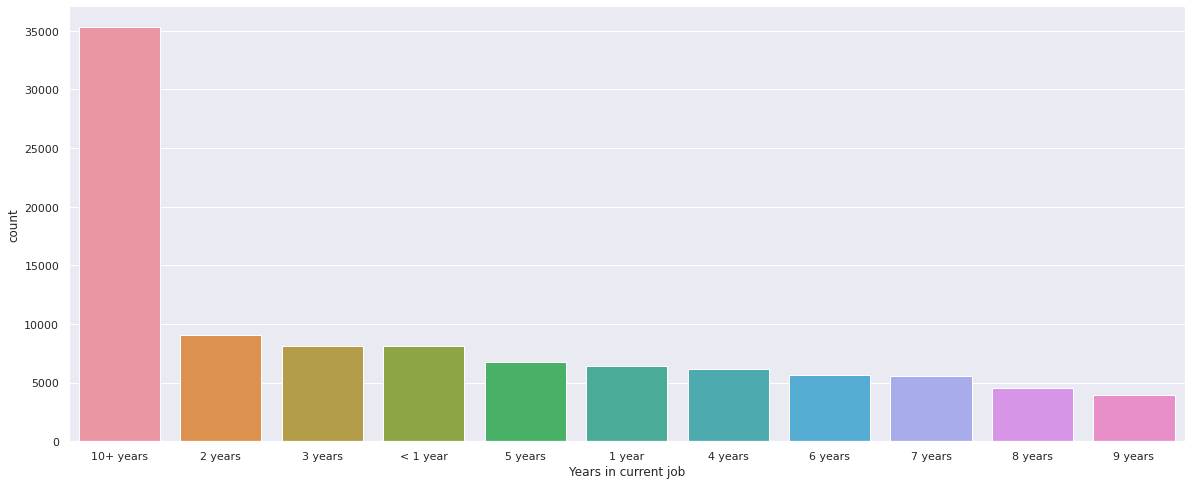

In [ ]:
# dropping column with > 50% null values
credit_df.drop(columns='Months since last delinquent', axis=1, inplace=True)

# last 514 rows are null
credit_df.drop(credit_df.tail(514).index, inplace=True) # dropping last 514 rows

# number of null values is very low in 'Maximum Open Credit', 'Tax Liens', 'Bankruptcies'
for row in credit_df['Maximum Open Credit'][credit_df['Maximum Open Credit'].isnull() == True].index:
    credit_df.drop(labels=row, inplace=True)

for row in credit_df['Tax Liens'][credit_df['Tax Liens'].isnull() == True].index:
    credit_df.drop(labels=row, inplace=True)

for row in credit_df['Bankruptcies'][credit_df['Bankruptcies'].isnull() == True].index:
    credit_df.drop(labels=row, inplace=True)

credit_df.fillna(credit_df.mean(), inplace=True) # filling null values with means (numerical)
credit_df.fillna('10+ years', inplace=True) # filling null values with '10+ years' (categorical)

plt.figure(figsize=(20,8))
sns.countplot(credit_df['Years in current job'], order=credit_df['Years in current job'].value_counts().index)

In [ ]:
calc_null_vals(credit_df)

Columns: 16
Columns with null vals: 0


,Null Vals,% of Total Vals


In [ ]:
# one hot encoding categorical columns
cat_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']
credit_df = pd.get_dummies(data=credit_df, columns=cat_cols)

In [ ]:
# function for removing collinear features
def remove_collinear_features(X, threshold):
    y = X['Loan Status']
    X.drop(columns='Loan Status', inplace=True)

    # calculating correlation matrix
    corr_matrix = X.corr()
    itr = range(len(corr_matrix.columns)-1)
    drop_cols = []

    # iterating over correlation matrix and comparing correlations
    for i in itr:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                print(col.values[0], '|', row.values[0], '|', round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # dropping one of each pair of correlated columns
    drop_cols_set = set(drop_cols)
    X.drop(columns=drop_cols_set, inplace=True)

    # adding score back
    X['Loan Status'] = y

    return X

In [ ]:
credit_df = remove_collinear_features(credit_df, 0.6)

Bankruptcies | Number of Credit Problems | 0.75
Home Ownership_Rent | Home Ownership_Home Mortgage | 0.83
Purpose_Take a Trip | Home Ownership_HaveMortgage | 0.61


In [ ]:
credit_df.shape

(99794, 42)

In [ ]:
# creating features dataframe
features_df = credit_df.drop(columns='Loan Status')
sc = StandardScaler()
features_df = sc.fit_transform(features_df) # fitting and transforming features data

In [ ]:
# normalizing features
normalized_features_df = normalize(features_df)

# converting numpy array to pandas dataframe
normalized_features_df  = pd.DataFrame(normalized_features_df )

### 4. Clustering

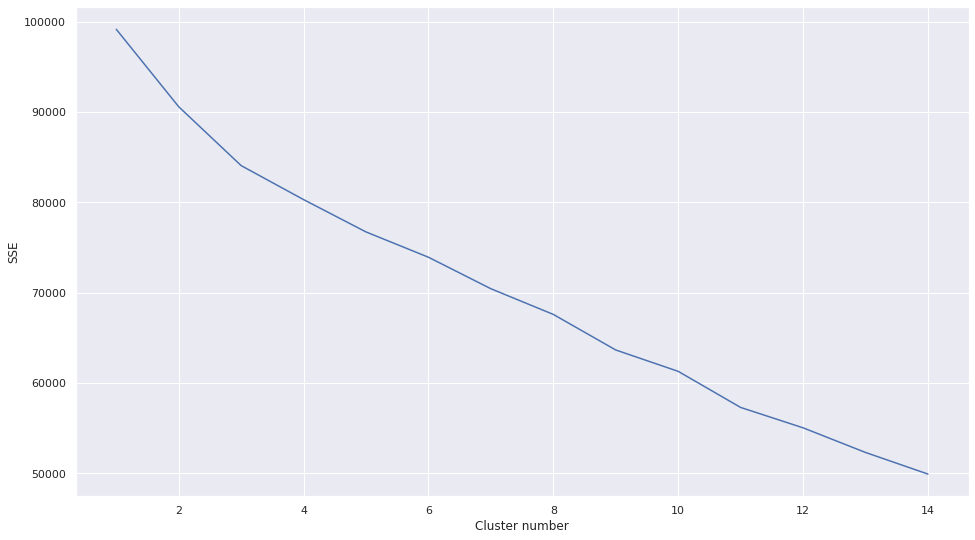

In [ ]:
# plotting SSEs of different clusters
plt.rcParams['figure.figsize'] = (16,9)

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_features_df)
    sse[k] = kmeans.inertia_ # inertia: within-cluster sum-of-squares

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using 3 clusters
kmeans = KMeans(3)
kmeans.fit(features_df)
labels = kmeans.labels_

In [ ]:
# creating labels dataframe
labels_df = pd.DataFrame(labels)
labels_df.columns = ['Cluster']
labels_df.shape

(99794, 1)

In [ ]:
# adding cluster labels to credit data
credit_data = credit_df.values.tolist()
credit_data_df = pd.DataFrame(credit_data)
credit_data_df.columns = credit_df.columns
clusters_df = pd.concat([credit_data_df, labels_df], axis=1)
clusters_df.shape

(99794, 43)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

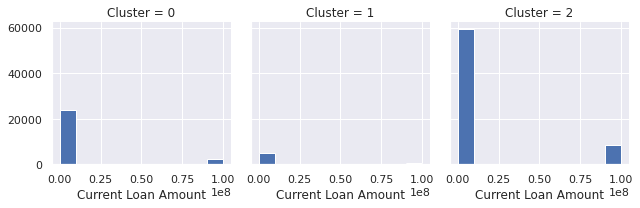

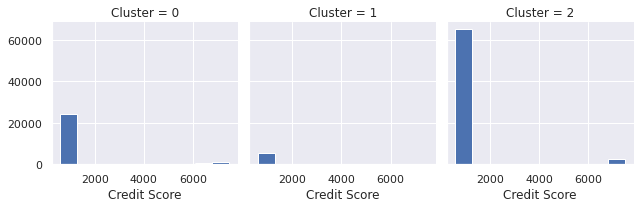

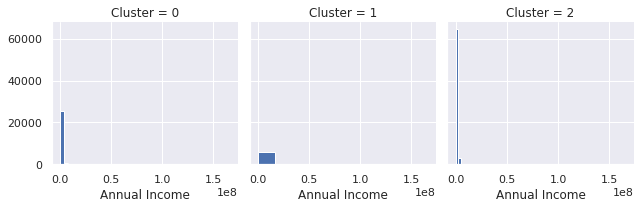

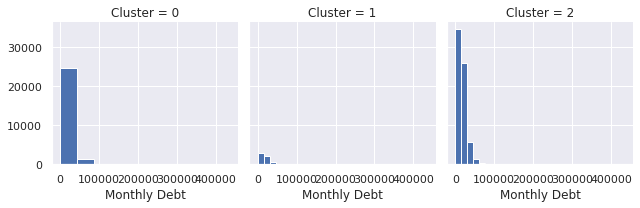

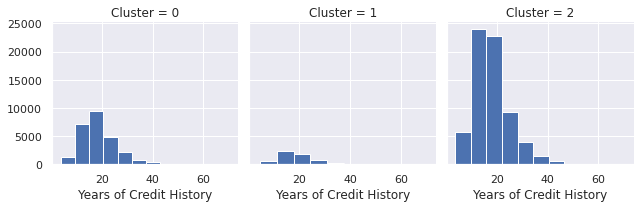

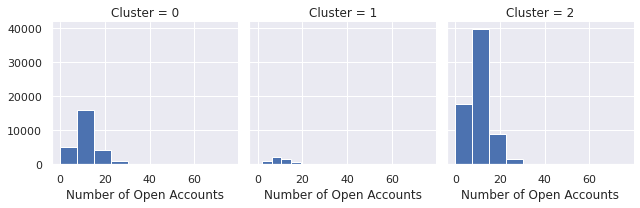

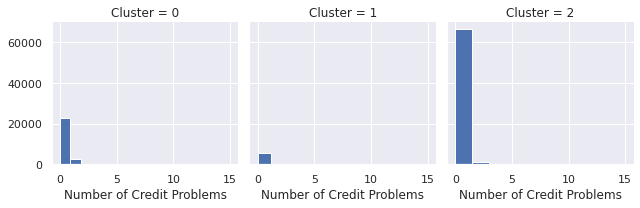

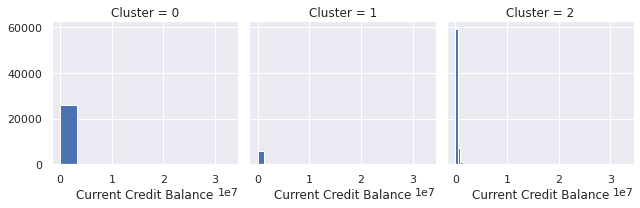

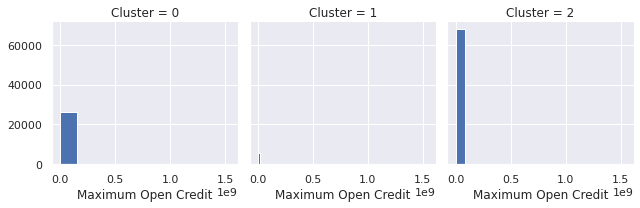

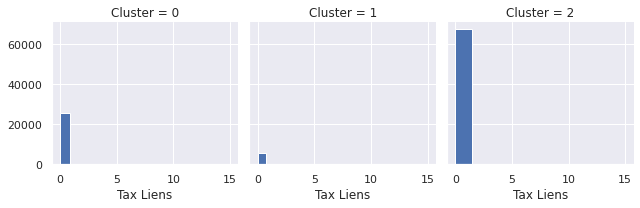

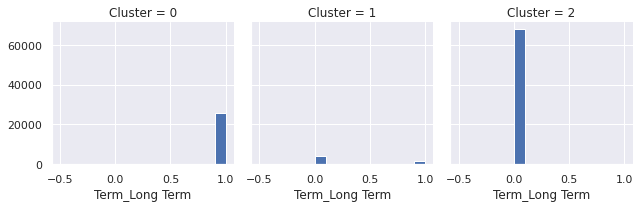

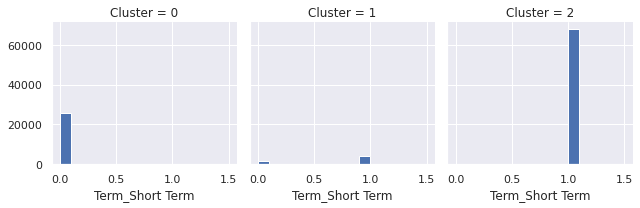

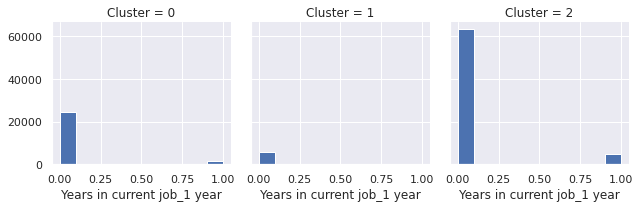

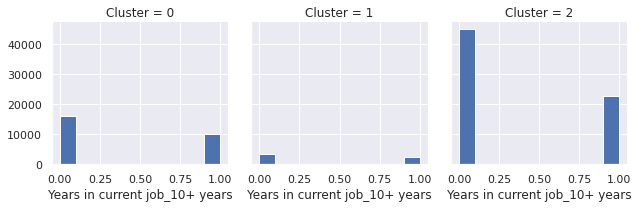

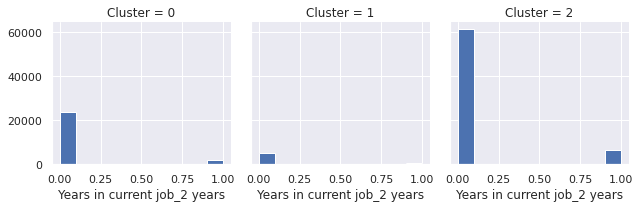

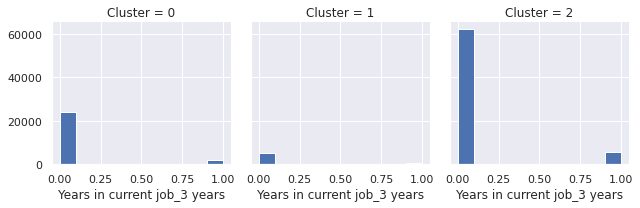

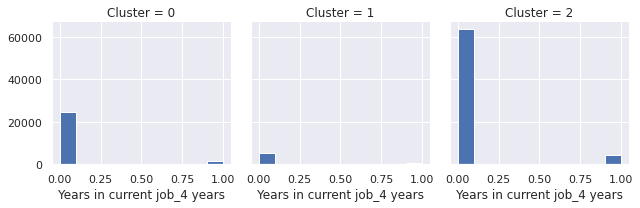

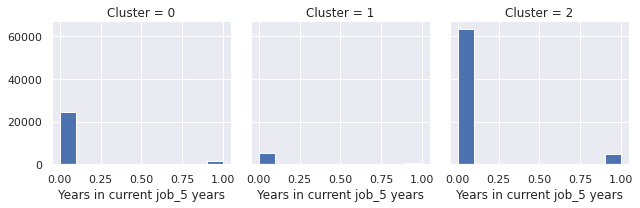

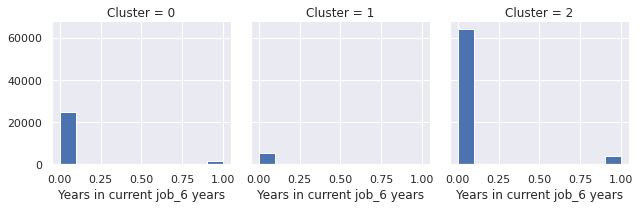

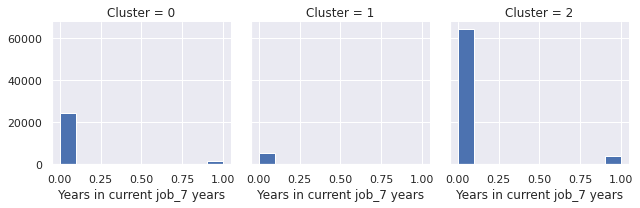

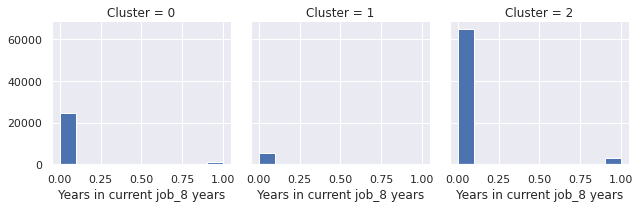

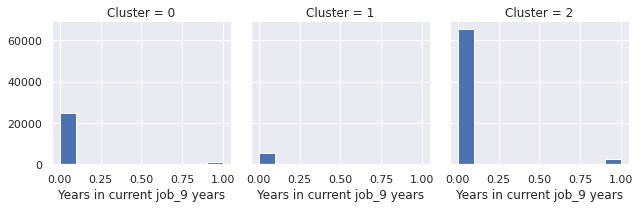

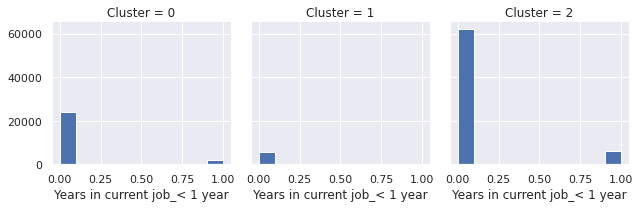

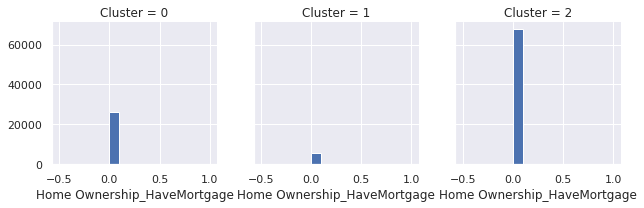

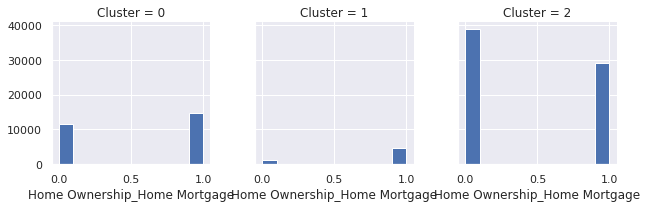

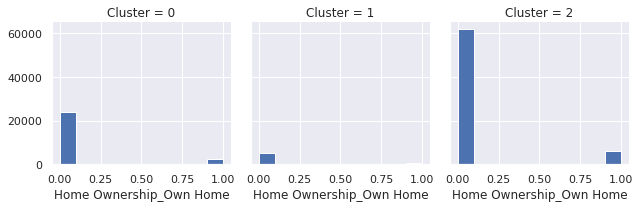

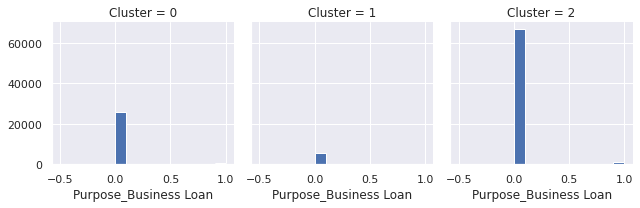

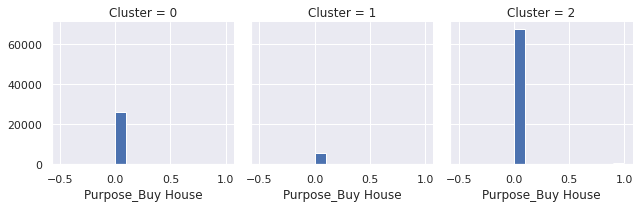

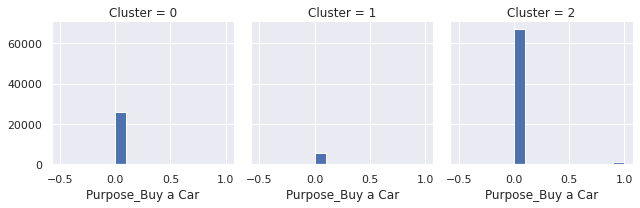

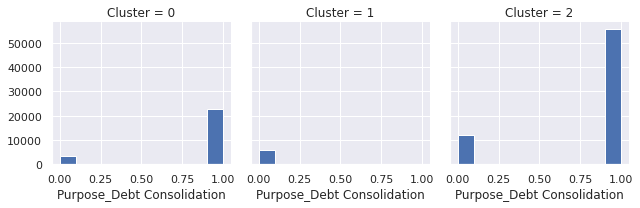

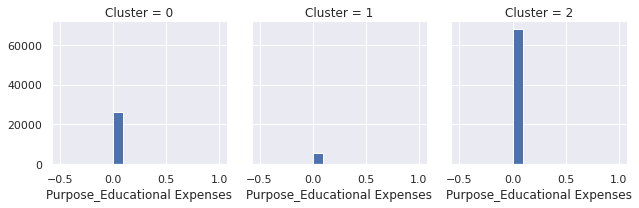

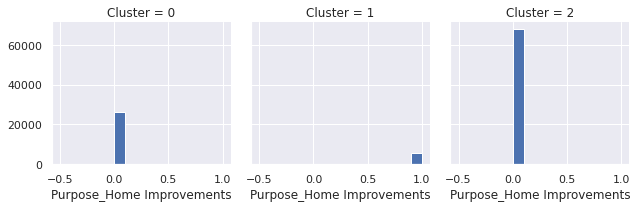

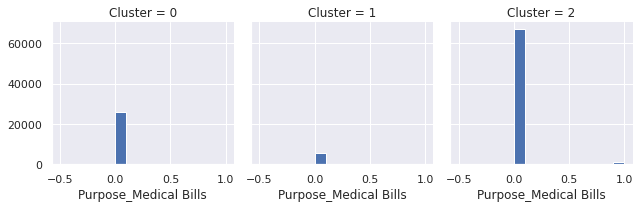

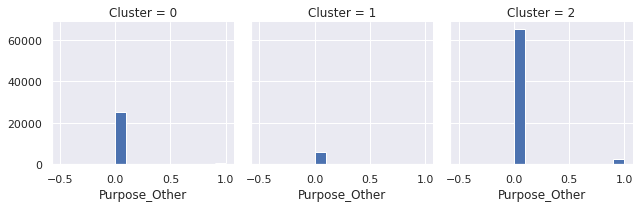

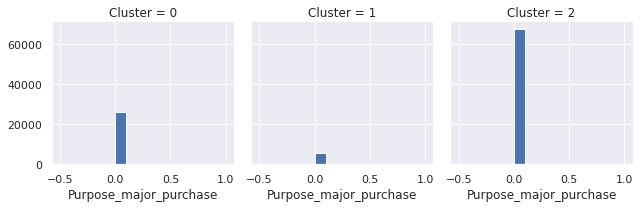

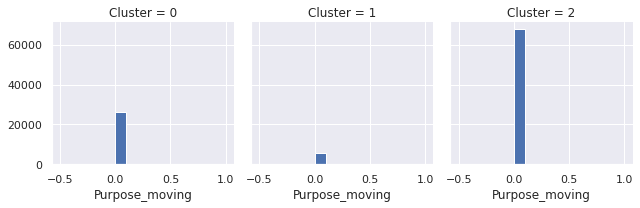

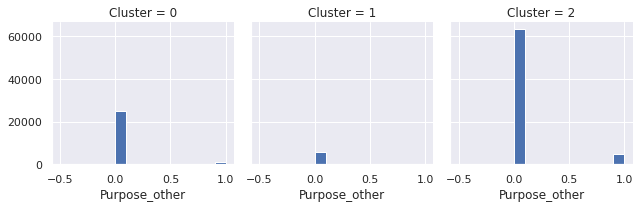

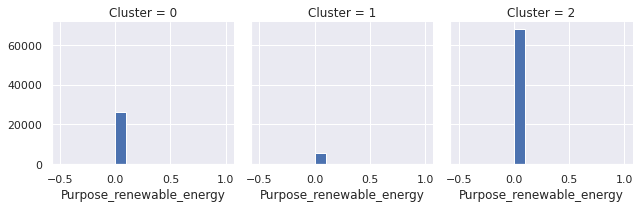

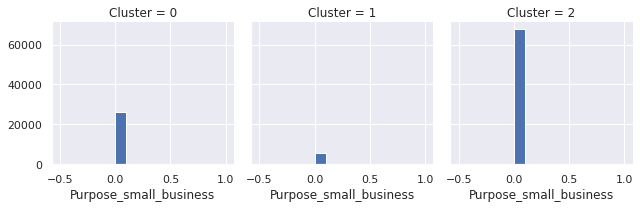

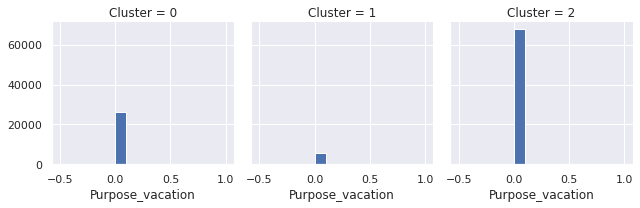

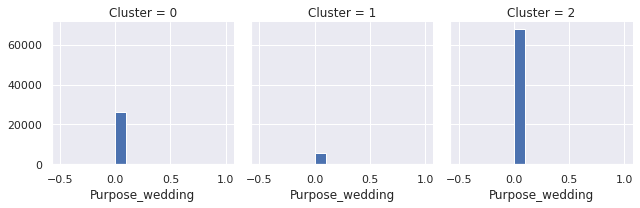

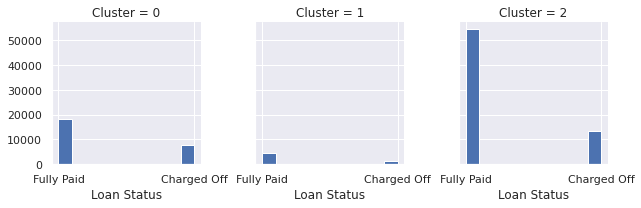

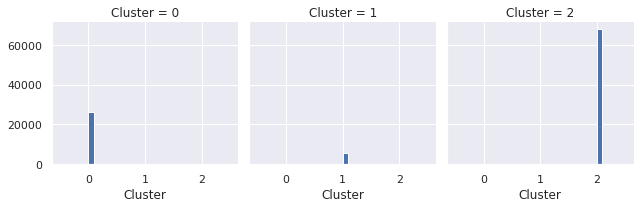

In [ ]:
# plotting histograms of columns with clusters
for c in clusters_df.columns:
    grid = sns.FacetGrid(clusters_df, col='Cluster')
    grid.map(plt.hist, c)

In [ ]:
# counting entries in each cluster
clusters_df['Cluster'].value_counts()

2    67888
0    26077
1     5829
Name: Cluster, dtype: int64

In [ ]:
# mean values after grouping by clusters
clusters_df.groupby('Cluster').mean()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8.672337e+06,1150.716714,1.500947e+06,21938.661999,18.692116,11.864287,0.141159,378490.857039,991747.722284,0.027879,0.996357,0.003643,0.056870,0.387736,0.082103,0.073820,0.054876,0.065805,0.056832,0.057905,0.047935,0.043103,0.073015,0.000614,0.561759,0.084749,0.016681,0.007708,0.011198,0.873145,0.000268,0.000000,0.007861,0.023622,0.003413,0.000959,0.048817,0.000115,0.003029,0.000192,0.000690
1,1.247386e+07,1027.288778,1.639930e+06,17798.900250,18.945188,10.720364,0.237434,267166.317722,947767.314462,0.034997,0.310516,0.689484,0.052496,0.400583,0.084062,0.074455,0.064848,0.067250,0.059015,0.051295,0.050266,0.040144,0.055584,0.000000,0.786241,0.133985,0.000000,0.000000,0.000000,0.000172,0.000000,0.999828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.288073e+07,1051.886805,1.308783e+06,17218.938444,17.937717,10.884457,0.173197,264819.956089,651223.455692,0.029460,0.000000,1.000000,0.068451,0.336819,0.095348,0.085317,0.063678,0.068790,0.056711,0.055444,0.044573,0.038166,0.086702,0.002902,0.428677,0.090900,0.016498,0.007026,0.014259,0.819880,0.001267,0.000000,0.013537,0.038681,0.003874,0.001841,0.069777,0.000103,0.002917,0.001414,0.001385


### 5. Visualizing clusters

In [ ]:
# cluster analysis in 2D plane
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_features_df)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal component 1', 'Principal component 2'])
principal_df.head()

,Principal component 1,Principal component 2
0,-0.200617,-0.066969
1,0.389940,0.222060
2,-0.161612,-0.096573
3,-0.108082,-0.460803
4,-0.331059,-0.063188


In [ ]:
# adding cluster labels to principal components
final_df = pd.concat([principal_df, labels_df], axis=1)
final_df.head()

,Principal component 1,Principal component 2,Cluster
0,-0.200617,-0.066969,1
1,0.389940,0.222060,2
2,-0.161612,-0.096573,2
3,-0.108082,-0.460803,0
4,-0.331059,-0.063188,2


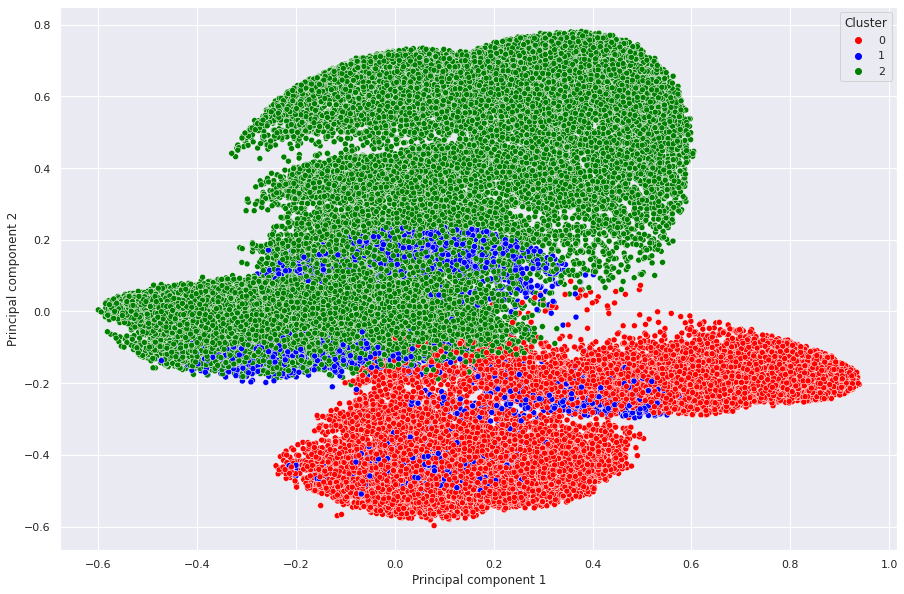

In [ ]:
# plotting clusters
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='Principal component 1', 
                     y='Principal component 2', 
                     data=final_df, 
                     hue='Cluster', 
                     palette=['red','blue','green'])
plt.show()

### 6. Analyzing clusters

In [ ]:
status_cluster_df = clusters_df[['Loan Status', 'Cluster']]

In [ ]:
cluster_0 = status_cluster_df[status_cluster_df['Cluster'] == 0]
cluster_1 = status_cluster_df[status_cluster_df['Cluster'] == 1]
cluster_2 = status_cluster_df[status_cluster_df['Cluster'] == 2]

In [ ]:
print('Loan Status Proportion of Whole Dataset (Unit: %)')
(status_cluster_df.groupby('Loan Status').count() / len(status_cluster_df) * 100).round(4)

Loan Status Proportion of Whole Dataset (Unit: %)


,Cluster
Loan Status,
Charged Off,22.6336
Fully Paid,77.3664


In [ ]:
print('Loan Status Proportion of Cluster 0 (Unit: %)')
(cluster_0.groupby('Loan Status').count() / len(cluster_0) * 100).round(4)

Loan Status Proportion of Cluster 0 (Unit: %)


,Cluster
Loan Status,
Charged Off,30.3447
Fully Paid,69.6553


In [ ]:
print('Loan Status Proportion of Cluster 1 (Unit: %)')
(cluster_1.groupby('Loan Status').count() / len(cluster_1) * 100).round(4)

Loan Status Proportion of Cluster 1 (Unit: %)


,Cluster
Loan Status,
Charged Off,19.952
Fully Paid,80.048


In [ ]:
print('Loan Status Proportion of Cluster 2 (Unit: %)')
(cluster_2.groupby('Loan Status').count() / len(cluster_2) * 100).round(4)

Loan Status Proportion of Cluster 2 (Unit: %)


,Cluster
Loan Status,
Charged Off,19.9019
Fully Paid,80.0981
